<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/Introduction_to_Cartopy_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<CENTER>
<H1 style="color:black">
Introduction to Cartopy - Part 1
</H1>
</CENTER>

# **Disclaimer**
> This notebook is based on work from an [ASTG python course](https://colab.research.google.com/drive/1zpD2W9JTPW1F6F8EpO5MiESlAhnUgv8F#scrollTo=o4MLuIvBqHc0&line=2&uniqifier=1). I updated the code, corrected errors and split the content in 2 parts of which the 2nd one can be found here. 

>All this is also uploaded to my [personal GitHub page](https://github.com/opinner/Articles/blob/main/Articles/Introduction_to_Cartopy_Part1.ipynb). There, you can also access the [interactive version](https://colab.research.google.com/drive/1zpD2W9JTPW1F6F8EpO5MiESlAhnUgv8F?usp=sharing) if you click the link to Google Colaboratory. 

<font size = 3> [*Ole Pinner*](https://www.awi.de/en/about-us/organisation/staff/single-view/ole-pinner.html) </font>
---   
                                               

# Table of Contents:

- Drawing a map
- Adding features 
- Regional maps
- *Scale bars*
- Overlaying data
- pandas
- netcdf
- xarray
---

## Reference Documents

* <A HREF="https://scitools.org.uk/cartopy/docs/latest/">Introduction --- Cartopy</A>
* <A HREF="https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html">Maps with Cartopy</A>
* <A HREF="https://geohackweek.github.io/visualization/03-cartopy/">Basics: Quick + Simple maps with cartopy.</A>
* <A HREF="https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/">Cartography and Mapping in Python</A>
* <A HREF="https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/">Introduction to Vector Format Spatial Data - Points, Lines and Polygons</A>
* <a href="https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map">Cartopy - Basic Maps [Scatter Map, Bubble Map & Connection Map]</a>

## What is Cartopy?

* A Python package which provides a set of tools for creating projection-aware geospatial plots using the Python’s standard plotting package, `Matplotlib`.
* Package for drawing maps for for data analysis and visualization,
* Relies on the `PROJ.4`, `Numpy` and `shapely` libraries.
* Has a simple and intuitive drawing interface to Matplotlib.

## What Does Cartopy Provide?

* Facilities to transform coordinates to different <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections">map projections</a>
* `Matplotlib` is used to plot contours, images, vectors, lines or points in the transformed coordinates.
* Shorelines, river and political boundary datasets.
* Facilities for reading shapefiles.

Cartopy has two main building blocks:

1. **Projections (`cartopy.crs`):** A utility that provides the ability to define, and transform data among, cartographic projections. The `cartopy.crs` module (CRS = coordinate reference system a.k.a. projection) defines a set of projections which are useful in defining the desired projection of a plot. These projections augment the machinery of `Matplotlib` to allow for geospatial plots.
2. **Features (`cartopy.feature`):** A module for accessing geospatial data files, like shapefiles or GeoJSON. It has a convenient set of data loaders for adding context to maps (like coastlines, borders, place names, etc.). 



<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---
### <font color='red'> Only run the following cell if you are on Google Colab</font>
The following commands will try to install cartopy. Ff you run this in any other enviroment, you can safely comment out or delete this cell and install cartopy on your own or follow the [Cartopy doucmentation for installing](https://scitools.org.uk/cartopy/docs/latest/installing.html).


In [43]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

#!apt-get -qq install python-cartopy python3-cartopy
#!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
#!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
proj-bin is already the newest version (7.2.1-1~focal0).
proj-data is already the newest version (7.2.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***
## Importing the necessary packages

In [44]:
# Without this, warnings will be thrown of which most of them are only annoying. 
# Try commenting this cell out to see everything more verbose.
import warnings
warnings.filterwarnings('ignore')

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [46]:
print(cartopy.__version__)

0.21.1


### Drawing a Map

<font color="green">Setting up a figure, with a Simple Scatter Plot as example</font>

We start with an extremely short introduction to matplotlib.

<a href="https://realpython.com/python-matplotlib-guide/">The Matplotlib Object Hierarchy</a>

- When we issue the call `plt.plot(x, y)`, we internally creates a hierarchy of nested Python objects: **Figure** and **Axes**.
- A **Figure** object is the outermost container for a matplotlib graphic, which can contain multiple **Axes** objects.
- An **Axes** actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).
- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels

![FIG_AXES](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
Image Source: Brad Solomon (Real Python Tutorial)

Below is a figure anatomy of the Matplotlib object hierarchy:

![Anatomy](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)
Image Source: Brad Solomon (Real Python Tutorial)



**There are many different ways to create a figure:**

In [92]:
#setting up example data, that could be geographical coordinates
np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

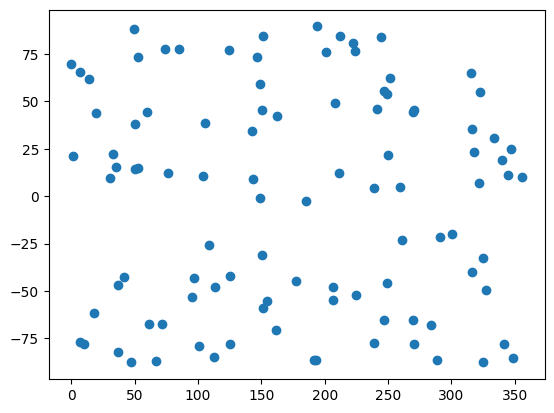

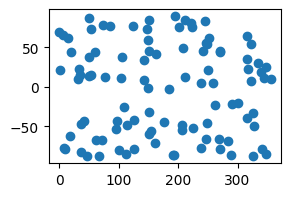

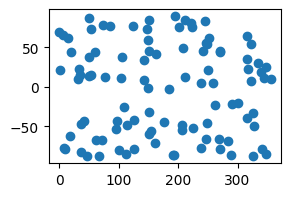

In [93]:
# let matplotlib create the figure and axes automatically.
# all properties like figure size are default values.
# really useful for plottings simple data, less useful for more complicated figures
# which maps almost always are.
plt.scatter(x,y) 

# define the figure and axes explicitly
fig = plt.figure(figsize=(3, 2)) #fig size can be set in unit of inches
# For the meaning of the 1s, take a look in the matplotlib documentation of axes objects
ax = fig.add_subplot(1, 1, 1)  
ax.scatter(x, y) #plot the data

# define the figure and axes less verbose, but in a oneliner
# most useful for multiple subplots, but here, there is only 1
fig, ax = plt.subplots(1, figsize=(3, 2)) #fig size again in unit of inches
ax.scatter(x, y) #plot the data

<font color="blue"></font>

<font color="green">Add Basic Map on top of the Scatter Plot</font>



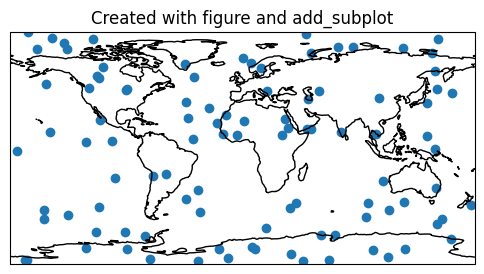

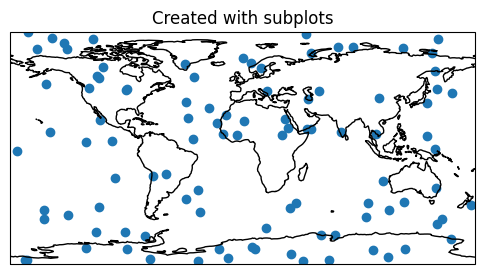

In [94]:
# setting up figure and axes explicitly
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(x, y)
ax.coastlines()
ax.set_title("Created with figure and add_subplot")
# define the figure and axes les verbose, but in a oneliner
# most useful for multiple subplots, but here there is only 1
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(6,4))
ax.scatter(x, y)
ax.coastlines()
ax.set_title("Created with subplots");

<font color="green">Add Land Ocean Image</font>

We can introduce natural earth look to the plot by calling the `stock_img()` method on the axes object.

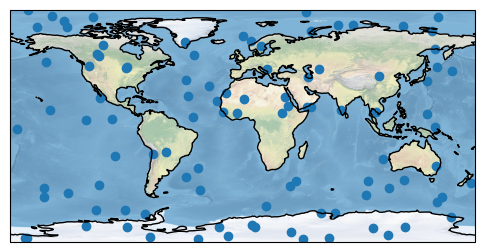

In [95]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(x, y)
ax.stock_img()
ax.coastlines()

## Add Features to the Map
<a name='#addfeatures'></a>
We add features by calling the `add_feature()` method on-axis object and passing a feature object available from the `cartopy.feature` module.

We can add the following features (part of `cartopy.feature`) to our map:

- `COASTLINE`: Adds coastline around all continents. 
- `LAND`: Adds land on top of world map. 
- `LAKES`: Adds big lakes of the world. 
- `BORDERS`: Adds country borders for the whole world. 
- `OCEAN`: Adds ocean with a color.
- `RIVERS`: Adds big rivers of the world.
- `STATES`: Adds state boundary for the US.

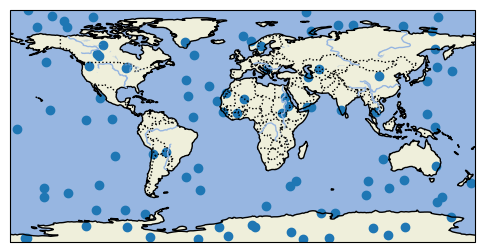

In [96]:
fig = plt.figure(figsize=(6, 4))

# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(x, y)

# Add land
ax.add_feature(cartopy.feature.LAND)

# Add ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)

# Add country boundaries
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Add lakes
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

# Add rivers
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

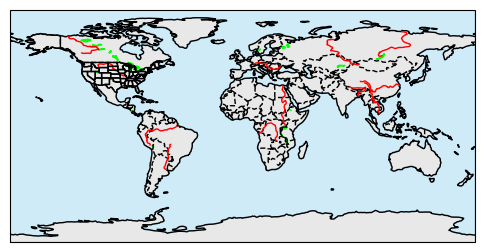

In [97]:
fig = plt.figure(figsize=(6, 4))

central_longitude = 40.0 # default value is zero
# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cfeature.LAKES, color="lime")
ax.add_feature(cfeature.BORDERS, linestyle="--")
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.4)
ax.add_feature(cfeature.RIVERS, edgecolor="red")
ax.add_feature(cfeature.STATES)
plt.show()

**Adding NightShade Feature to Map**

- We create a `datetime` object and pass it to a `Nightshade` object so that it can create nightshade on a map at this time. 
- It creates a shade effect on a map covering countries where it is night during that time.

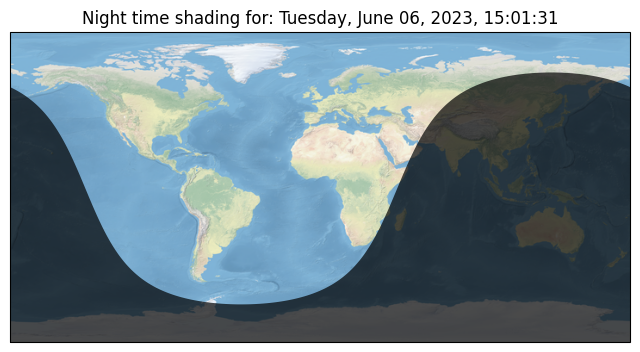

In [98]:
import datetime

fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()

cur_date = datetime.datetime.now()
ax.add_feature(Nightshade(cur_date, alpha=0.7))

ax.set_title('Night time shading for: {}'.format(cur_date.strftime("%A, %B %d, %Y, %H:%M:%S")))

plt.show()

## Choosing Different Map Projections
<a id='#mapprojections'></a>

Up until now, we used only the PlateCarree projection, which is just a regular grid of the longitude and longitude lines. But other projections are also possible and often a better choice. See also the <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html"> Cartopy Map Projection List</a>.

#### Understanding Projection and Transform Keywords
+ The projection of your axes is independent of the coordinate system your data is defined in.
+ The `projection` argument is used when creating plots and determines the projection of the resulting plot.
+ The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

<font color="green">Lambert Cylindrical </font>

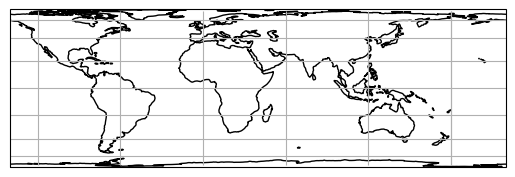

In [99]:
central_longitude = 40.0 # default value is zero

# Select the map projection
ax = plt.axes(projection=cartopy.crs.LambertCylindrical(central_longitude))

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()

plt.show()

<font color="green">Mercator </font>

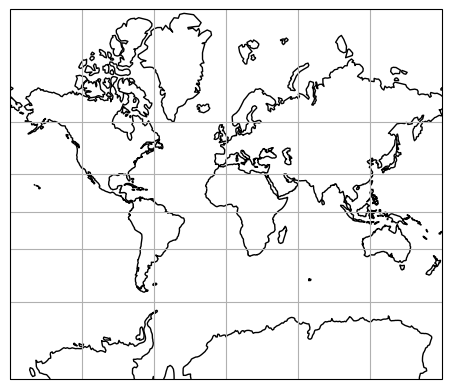

In [100]:
ax = plt.axes(projection=cartopy.crs.Mercator())
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()
plt.show()

<font color="green">Orthographic</font>

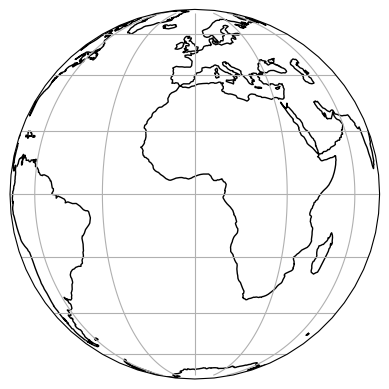

In [101]:
ax = plt.axes(projection=cartopy.crs.Orthographic())
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()
plt.show()

<font color="green">Collection of Projections</font>

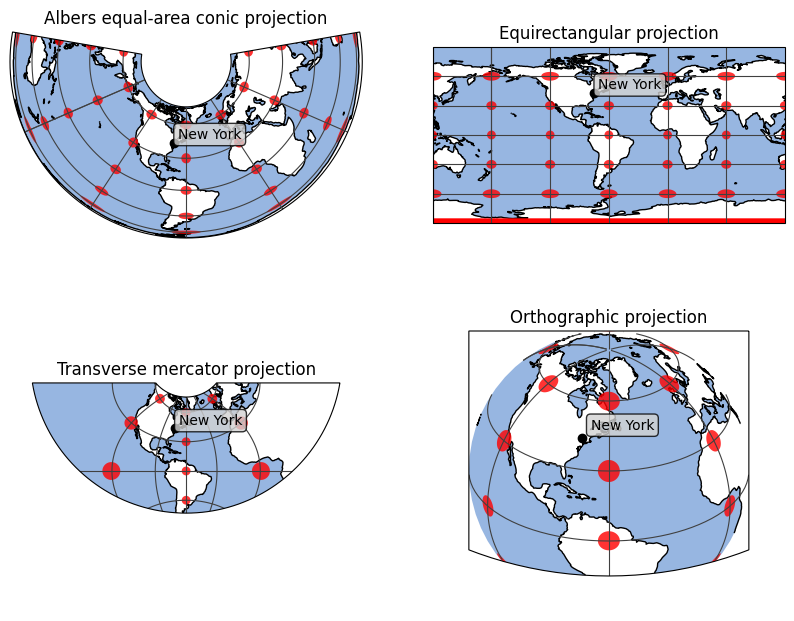

In [102]:
from cartopy.feature import OCEAN

projections = [ccrs.AlbersEqualArea(-60), ccrs.PlateCarree(-60), 
               ccrs.TransverseMercator(-60), ccrs.Orthographic(-60, 30)]
titles = ['Albers equal-area conic projection',
          'Equirectangular projection', 
          'Transverse mercator projection', 
          'Orthographic projection']

fig, axes = plt.subplots(2, 2, 
                         subplot_kw={'projection': ccrs.AlbersEqualArea(-60)}, 
                         figsize=(10,8))
# Note: This plot does not work correctly for me 
# if the default given projection is PlateCaree
# and I have no clue why

# axes is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axes = axes.flatten()

ny_lon, ny_lat = -75, 43

#loop over the 4 subplots
for ax, proj, title in zip(axes, projections, titles):
    ax.projection = proj      # Here we change projection for each subplot.
    ax.set_title(title)       # Add title for each subplot.
    ax.set_global()           # Set global extention
    ax.coastlines()           # Add coastlines
    ax.add_feature(OCEAN)     # Add oceans
    ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30))         # Add tissot indicatrisses
    ax.plot(ny_lon, ny_lat, 'ko', transform=ccrs.Geodetic())               # Plot the point for the NY city
    ax.text(ny_lon + 4, ny_lat + 4, 'New York',                            # Label New York
            c = "black", transform=ccrs.Geodetic(),
            bbox=dict(facecolor='lightgrey', edgecolor='black', alpha = 0.8, boxstyle='round')) 
    ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30))                 # Add gridlines
plt.show()

## Regional Maps
<a id='#regionalmaps'></a>
To show less than the whole globe, you need to provide the longitude and latitude ranges as arguments of the `set_extent` method on the axes object:

```python
   ax.set_extent([min_lon, max_lon, min_lat, max_lat])
```

<font color="green"> Map of the United States of America </font>

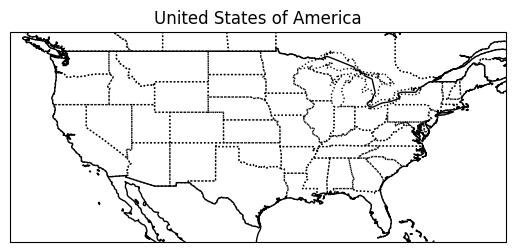

In [103]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES, linestyle=':')
ax.add_feature(cartopy.feature.BORDERS)

ax.set_extent([-130, -65, 24, 47])
ax.set_title("United States of America")
plt.show()

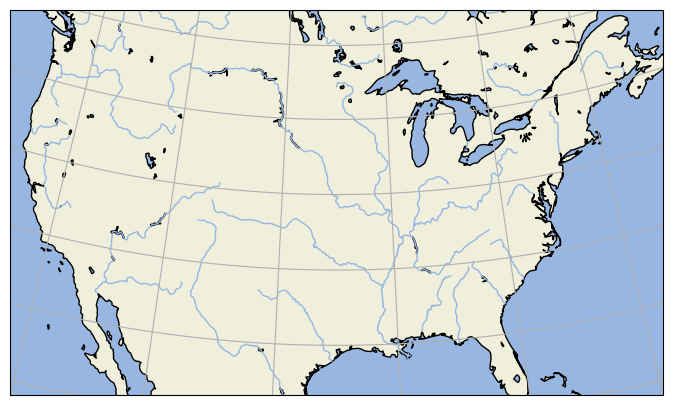

In [104]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

<font color="green"> Map of Africa </font>

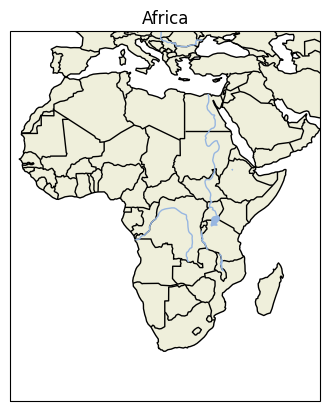

In [105]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.LAKES)

ax.set_extent([-20, 60, -40, 40])
ax.set_title("Africa")
plt.show()

## Overlaying Data
<a id='#overlyingdata'></a>

#### Line Plots on a Map

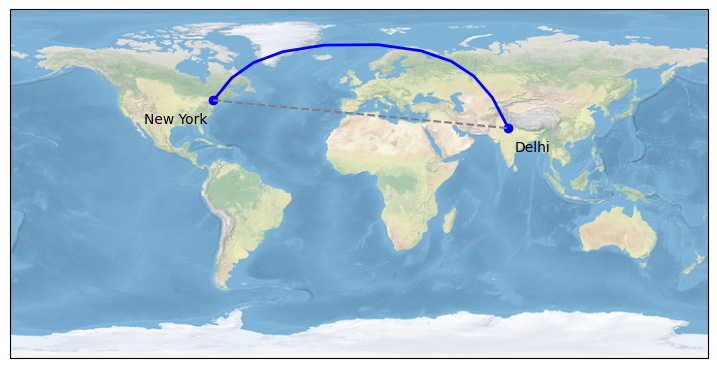

In [106]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

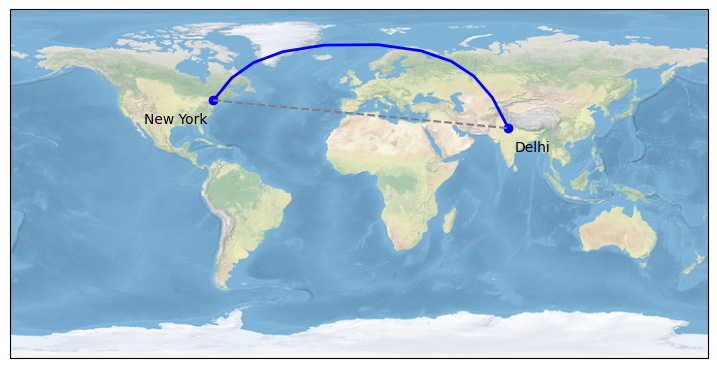

In [107]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

ax.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

ax.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

### <font color="green">Simple Application</font>
In a recent trip overseas, the plane's display monitor in front of me caught my attention.
Every now and then, there was a map of the world where different cities (across all continents) were plotted together with their local times. While watching the map, I wondered how I could use Cartopy to produce a similar one.

### <font color='red'> Only run the following cell if you are on Google Colab</font>

In [108]:
!pip install timezonefinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import datetime
import pytz
import timezonefinder

def get_local_time(latitude, longitude):
    """
      Given the latitude/longitude pair, this function
      returns the current local time at the location.
    """
    tf = timezonefinder.TimezoneFinder()

    # Get the tz-database-style time zone name
    # (e.g. 'America/Vancouver') or None
    timezone_str = tf.certain_timezone_at(lat=latitude, lng=longitude)

    if timezone_str:
       # Display the current time in that time zone
       timezone = pytz.timezone(timezone_str)
       dt = datetime.datetime.utcnow()
       return (dt + timezone.utcoffset(dt)).strftime('%H:%M:%S')
    else:
       # Could not determine the time zone
       return

In [110]:
cities_names = ['Yaounde', 'London', 'New Dehli', 'Canberra', 'Ottawa', 'Buenos Aires']
latitudes    = [03.50, 51.36, 28.37, -35.15, 45.27, -36.30]
longitudes   = [11.35, -0.05, 77.13, 149.08, -75.42, -60.0]

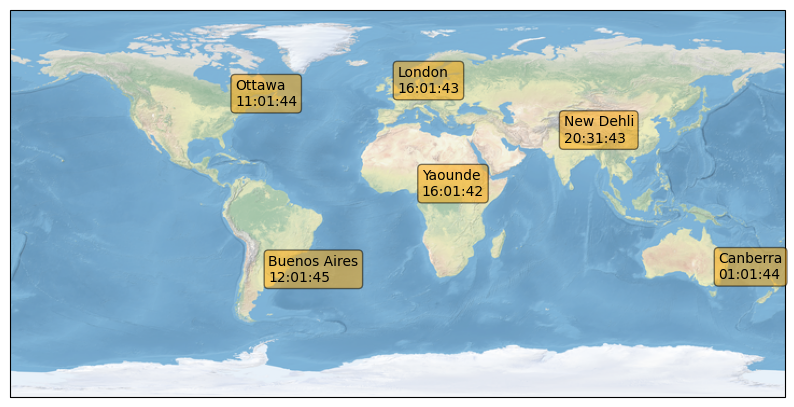

In [111]:
# Create a new figure with a specified size
plt.figure(figsize=(10,6))

# Define the map projection to be Plate Carree
map_projection = ccrs.PlateCarree()

# Create an axes object with the specified map projection
ax = plt.axes(projection=map_projection)

# Add a stock image to the axes to provide geographical context
ax.stock_img()

# Define properties for the text box that will display city names and local time
props = dict(boxstyle='round', facecolor='orange', alpha=0.5)

# Iterate over the cities and their coordinates
for i in range(len(cities_names)):
    # Get the local time for the city's coordinates
    loc_time = get_local_time(latitudes[i], longitudes[i])
    
    # Create the text string to display city name and local time
    textstr = "\n".join((cities_names[i], loc_time))
    
    # Add the text box with city name and local time at the specified coordinates
    plt.text(longitudes[i], latitudes[i], textstr, bbox=props,
             transform=ccrs.Geodetic())

# Display the plot
plt.show()


### Basic Map

In [130]:
nlats, nlons = 73, 145
lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)

# Create a mesh grid
lons, lats = np.meshgrid(lons, lats)
wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data = wave + mean

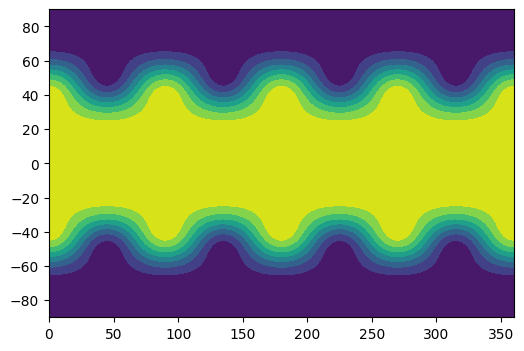

In [131]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.contourf(lons, lats, data)

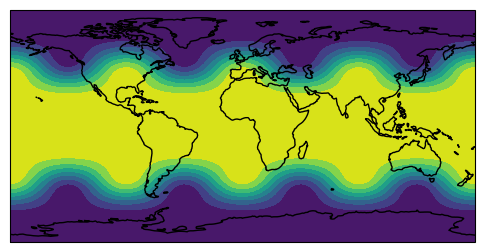

In [132]:
plt.figure(figsize=(6, 4))

map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.contourf(lons, lats, data)
ax.coastlines()
ax.set_global()
plt.show()

#### Adding Latitude/Longitude Ticks

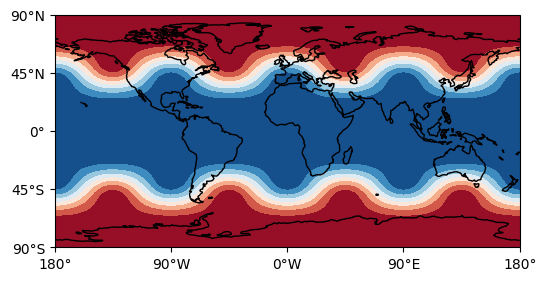

In [133]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.figure(figsize=(6, 4))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.contourf(lons, lats, data, cmap='RdBu')
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#ax.set_global()
plt.show()

#### Adding Colorbar

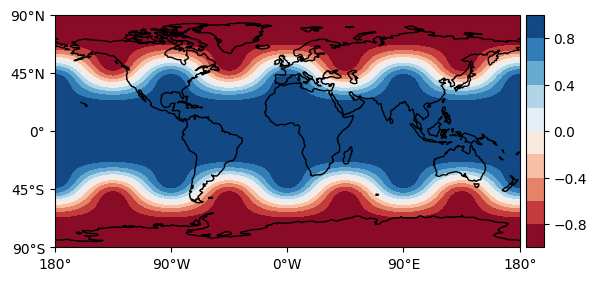

In [134]:
fig = plt.figure(figsize=(6, 4))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
clevs = [-1.0, -0.7, -0.45, -0.16, 0.5, 0.7]
im = ax.contourf(lons, lats, data, levels=10, cmap='RdBu', transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Create an axes for colorbar. 
# The position of the axes is calculated based on the position of ax.
# You can change dspace to adjust the distance between the main image and the colorbar.
# You can change dwidth to adjust the width of the colorbar.
# This practice is universal for both subplots and GeoAxes.
dspace = 0.01
dwidth = 0.03
cax = fig.add_axes([ax.get_position().x1 + dspace,
                    ax.get_position().y0,  dwidth,
                    ax.get_position().height])
plt.colorbar(im, cax=cax)


ax.set_global()
plt.show()

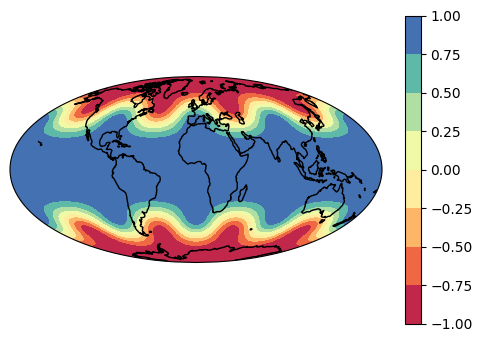

In [135]:
f = plt.figure(figsize=(6, 4))
ax = plt.axes(projection=ccrs.Mollweide())
im = ax.contourf(lons, lats, data, \
            transform=ccrs.PlateCarree(), \
            cmap='Spectral')
ax.coastlines()

#cax = fig.add_axes()
f.colorbar(im, ax = ax)
ax.set_aspect('equal') 

ax.set_global()
plt.show()

## Adding a scale bar to the map
<a id='#scalebar'></a>


In [136]:
#to be added

## Plotting data in a pandas Dataframe
<a id='#pandas'></a>
<font color="green"> Cities around the world </font>

- The code below creates a Pandas dataframe that contains the latitude and longitude data of a city in each country of the world.
- The script plots a map of the world, country boundaries and include a dot at each of the cities.

In [137]:
import pandas as pd

url = "https://developers.google.com/public-data/docs/canonical/countries_csv"

df = pd.read_html(url)
df = df[0]
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


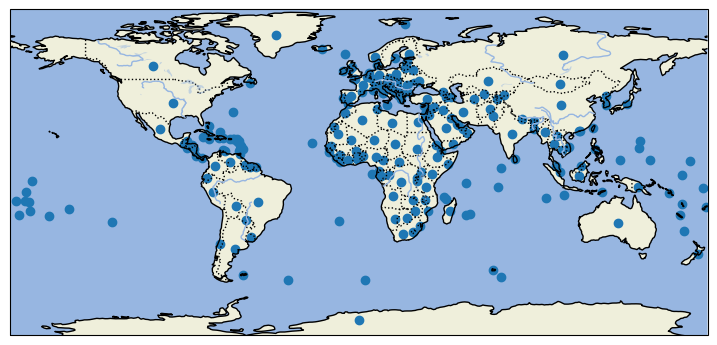

In [148]:
fig = plt.figure(figsize=(9, 5))

# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(df.longitude, df.latitude)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

## Plotting data in netCDf format
<a id='#netcdf'></a>

We want to use the netCDF file:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc

to plot the surface air temperature (variable `tas`).

* The code below obtains the netCDF file and extracts the variable `tas`.
* You need to use cartopy to do a contour plot and add the colorbar.

The metadata of the file is located at:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.cdl

### <font color='red'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [139]:
!pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
!ls

sample_data  sresa1b_ncar_ccsm3-example.nc


In [141]:
# Get the remote  file
import urllib.request
import os

url = "https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc"

nc_file = os.path.basename(url)
urllib.request.urlretrieve(url, nc_file)

('sresa1b_ncar_ccsm3-example.nc', <http.client.HTTPMessage at 0x7f8d056ae0b0>)

**`ncdump -h` the netCDF file**

In [142]:
import netCDF4 as nc4
import numpy as np

def my_ncdump(file_name):
    with nc4.Dataset(file_name, mode='r') as ncfid:
         for name, var in ncfid.variables.items():
             print("{}:".format(name))
             print("{:>20}: {}".format("Dimension", var.dimensions))
             print("{:>20}: {}".format("Dimension value", var.shape))
             print("{:>20}: {}".format("Type", var.dtype))
             for attr in var.ncattrs():
                 print("{:>20}: {}".format(attr, var.getncattr(attr)))
         print()
         print("Global attributes")
         for attr in ncfid.ncattrs():
             print("{:>20}: {}".format(attr, ncfid.getncattr(attr)))
                
my_ncdump(nc_file)

area:
           Dimension: ('lat', 'lon')
     Dimension value: (128, 256)
                Type: float32
           long_name: Surface area
               units: meter2
lat:
           Dimension: ('lat',)
     Dimension value: (128,)
                Type: float32
           long_name: latitude
               units: degrees_north
                axis: Y
       standard_name: latitude
              bounds: lat_bnds
lat_bnds:
           Dimension: ('lat', 'bnds')
     Dimension value: (128, 2)
                Type: float64
lon:
           Dimension: ('lon',)
     Dimension value: (256,)
                Type: float32
           long_name: longitude
               units: degrees_east
                axis: X
       standard_name: longitude
              bounds: lon_bnds
lon_bnds:
           Dimension: ('lon', 'bnds')
     Dimension value: (256, 2)
                Type: float64
msk_rgn:
           Dimension: ('lat', 'lon')
     Dimension value: (128, 256)
                Type: int32
        

**Read the netCDF file**

In [143]:
# Open the netCDF file and read surface air temperature
from netCDF4 import Dataset
import numpy as np
with Dataset(nc_file,'r') as ncid:
     lons = ncid.variables['lon'][:] # longitude grid points
     lats = ncid.variables['lat'][:] # latitude grid points
     surf_temp = ncid.variables['tas'][0] 

print("Shape of lons:      ", np.shape(lons), lons[0], lons[-1])
print("Shape of lats:      ", np.shape(lats), lats[0], lats[-1])
print("Shape of surf_temp: ", np.shape(surf_temp))

Shape of lons:       (256,) 0.0 358.59375
Shape of lats:       (128,) -88.927734 88.927734
Shape of surf_temp:  (128, 256)


**Use `Cartopy` to do a contour plot**

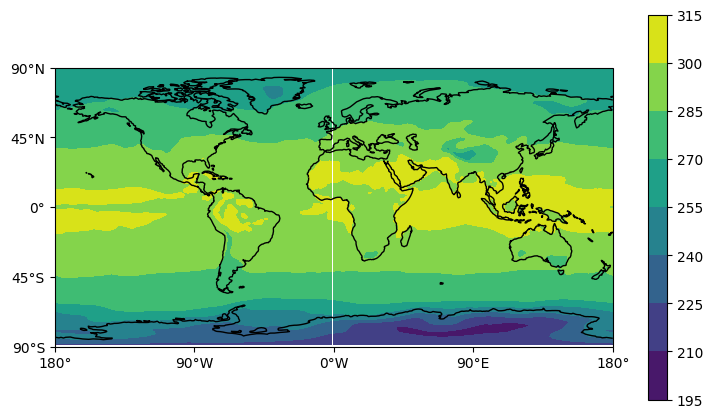

In [144]:
plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

**Remove the equatorial line**

- Make sure that we cycle the longitude

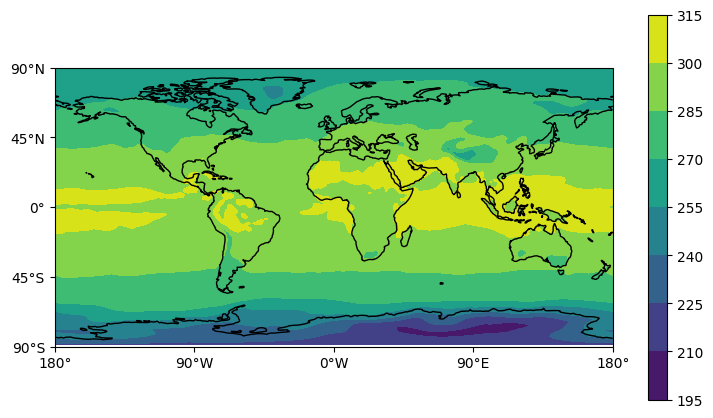

In [145]:
import cartopy.util

plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

surf_temp, lons = cartopy.util.add_cyclic_point(surf_temp, 
                                                coord=lons)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

<a id='#xarray'></a>

## Plotting data in xarray format
This example is taken from the [xarray documentation about maps](https://xarray.pydata.org/en/v2023.05.0/user-guide/plotting.html#maps). 

In [146]:
import xarray as xr

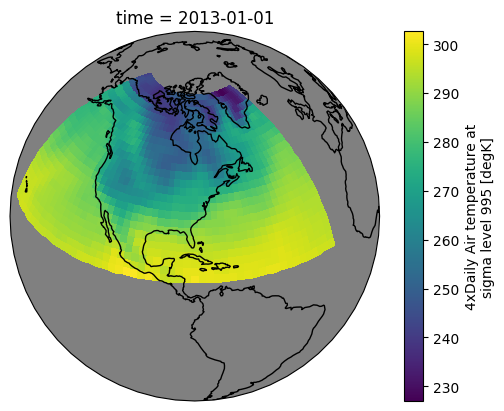

In [147]:
# Open the air temperature dataset using xarray's tutorial dataset
air = xr.tutorial.open_dataset("air_temperature").air

# Select the first time step in the dataset and plot the data
map_object = air.isel(time=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)

# Set the plot to a global extent
map_object.axes.set_global()

# Add coastlines to the plot
map_object.axes.coastlines()

# What's next?
For more complicated examples, look at the second part of this introduction. 
Examples specific to this working group are found in the *RegionalMaps.ipynb* notebook. 